In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##### Cargamos los datos

In [4]:
test = pd.read_csv('data/test/test.csv')
test.shape

(3972, 23)

In [5]:
train = pd.read_csv('data/train/train.csv')
train.shape

(14993, 24)

In [5]:
set(train.columns) ^ set(test.columns) # ^ es diferencia simetrica

{'AdoptionSpeed'}

##### Observamos que State es un numero, por ello cargaremos luego la tabla<br>de equivalencias para State para facilitar legibilidad


In [6]:
test.State.value_counts()

41326    1833
41401    1072
41327     510
41330     147
41336     127
41332     101
41324      73
41325      63
41335      17
41367       7
41345       7
41342       5
41415       4
41361       3
41380       3
Name: State, dtype: int64

In [7]:
train.State.value_counts()

41326    8714
41401    3845
41327     843
41336     507
41330     420
41332     253
41324     137
41325     110
41335      85
41361      26
41345      22
41367      15
41342      13
41415       3
Name: State, dtype: int64

##### Cargamos tabla de equivalencias de estados y la agregamos a train y test

In [6]:
df_state = pd.read_csv('data/state_labels.csv')
df_state.rename(columns={"StateID":"State"}, inplace=True)
df_state

,State,StateName
0,41336,Johor
1,41325,Kedah
2,41367,Kelantan
3,41401,Kuala Lumpur
4,41415,Labuan
5,41324,Melaka
6,41332,Negeri Sembilan
7,41335,Pahang
8,41330,Perak
9,41380,Perlis


In [7]:
train = pd.merge(train, df_state)
test = pd.merge(test, df_state)

### Quantity
Eventualmente nos encontramos con varias mascotas en un solo anuncio

In [50]:
df_quantcum = pd.DataFrame(train.Quantity.value_counts())
df_quantcum.rename(columns={'Quantity':'Freq'}, inplace=True)
df_quantcum['CumulativeFreq'] = df_quantcum.Freq.cumsum()
df_quantcum['RelFreq'] = df_quantcum.Freq / df_quantcum.Freq.sum()
df_quantcum['CumulativeRelFreq'] = df_quantcum.RelFreq.cumsum()
df_quantcum

,Freq,CumulativeFreq,RelFreq,CumulativeRelFreq
1,11565,11565,0.771360,0.771360
2,1422,12987,0.094844,0.866204
3,726,13713,0.048423,0.914627
4,531,14244,0.035417,0.950043
5,333,14577,0.022210,0.972254
6,185,14762,0.012339,0.984593
7,84,14846,0.005603,0.990195
8,52,14898,0.003468,0.993664
9,33,14931,0.002201,0.995865
10,19,14950,0.001267,0.997132


In [55]:
1 - 0.995865 #anuncios con 10 mascotas o mas

0.004135

Text(0.5, 1.0, 'Presencia de anuncios por cantidad de mascotas ofrecidas')

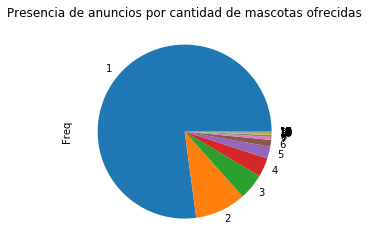

In [99]:
#ax = df_quantcum[df_quantcum.Freq > 100]['Freq'].plot.pie()
ax = df_quantcum['Freq'].plot.pie()
ax.set_title("Presencia de anuncios por cantidad de mascotas ofrecidas")

In [100]:
#se observa que el grupo mayoritario es el de anuncios con 1 mascota
#luego separaremos en dos grupos menores: anuncios con 2 o 3 mascotas y
#                                         anuncios con 4 o mas mascotas

In [33]:
def assign_group_quantity(original_quantity):
    if original_quantity <= 0:
        raise ValueError("Expected quantity > 0")
    if original_quantity == 1:
        return "Single pet"
    elif original_quantity < 3:
        return "Short group"
    else:
        return "Large group"

In [34]:
train['QuantityGroup'] = train.Quantity.apply(assign_group_quantity)
test['QuantityGroup']  = test.Quantity.apply(assign_group_quantity)

Observamos que los anuncios de mascotas solas ocupan más del 77% del total. <br>Asimismo, notamos que los anuncios con 10 mascotas o más representan menos del 0.5% del total, podríamos darle una revisión rápida

In [36]:
#pd.set_option('display.max_info_rows',-1)
pd.set_option('display.max_colwidth',-1)


In [37]:
big_q_sample = train.loc[train.Quantity >= 10].sample(10)[['Name', 'Description', 'Quantity', 'AdoptionSpeed']]
big_q_sample

,Name,Description,Quantity,AdoptionSpeed
12277,NaN,They all born in my house. Indoor cat.,15,1
1500,( 0 Puppies Left )14+2 Puppies,"They are 2 stray mother dogs gave birth 14 puppies at car park lot hidden place. So, I bring all puppies back to my condo temporary take care and for adopters. Please help and give them 2nd chance. Only serious adopters welcome. Someone who will give the pups a loving home. Please call , SMS or Email , if you are interested to adopt. Thank you.",16,2
4031,12 Puppies,I found 12 cute puppies. And putting it on adpotion. Please call or sms or whatapp me.,12,4
14693,20 Little Puppies,"These are 20 puppies, from 2 stray mums need good homes. They are 2 weeks old. If you can give them a good home without caging or chaining, please whatsapp or msg Ms Grace Bong tel no:",20,4
1638,Puppies For Adoption,Many cute and beautiful puppies waiting for home. If u are interested pls contact,13,2
7882,Girl,"She is a stray cat - came to place abt a month ago. She delivered 5 babies yesterday .12. By nature she is very gentle and loving. Never strays away always around the house. Rarely meows for anything very quite cat. I am desperately looking for a good family to adopt them. I live in an apartment where animals are not allowed. Please anyone genuinely interested, pls call me. Thank you.",15,3
14712,Bailey,Bailey is an obedient and loyal dog Her owner is terminaaly ill and is unable to care for her,20,4
9725,Twiny,"Twiny is like digi, wherever you go. She follows. A little bit mischievous at times but certainly need attention.",10,4
6921,Please Give Us Home!,Im helping a friend. There are more than 10 kittens and cats who need home asap. They are strays and the kind lady feeds them with balance of KFC chicken that she took every night from the restaurant. Some of them need vet treatment. Some of them are too small to live outside. The kind lady didnt have fixed income to feed the kittens. They are dumped at the place by irresponsible owners and she is the one who take care and give shelter to all those kittens. kindly call me if you are interested to adopt them. they are tame and adorable. Call me to arrange visit.,10,1
832,NaN,"I had uploaded the pups' group photos earlier. But my kind hearted friend Nancy, took 17 of them home today and took individual shots of them and labelled their sex accordingly. Aren't they adorable. We heard the sad news from the school guard this morning that the headmistress will be calling MPPJ soon to 'get rid of all of them'. The pups are now sheltering with their mummies in a school compound in Bandar Utama. Pleeeease help to adopt them SOON. Do contact Nancy at if you want to take home one or two or more.",17,2


Text(0.5, 1.0, 'Tiempo de adopción para anuncios con 10 o más mascotas')

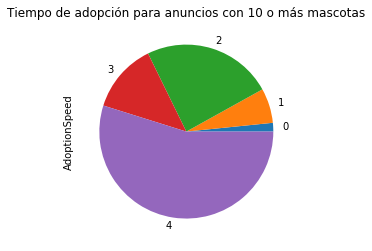

In [38]:
ax = train.loc[train.Quantity >= 10].AdoptionSpeed\
            .value_counts().sort_index()\
            .plot.pie()
ax.set_title('Tiempo de adopción para anuncios con 10 o más mascotas')

Existen casos en que se ofrecen demasiadas mascotas. Además se observa que a veces las cantidades
<br>en la descripción no encajan con las de la columna Quantity:

In [41]:
train.loc[[989,11673]][['Name', 'Description', 'Quantity', 'AdoptionSpeed']]

,Name,Description,Quantity,AdoptionSpeed
989,Cats From TTDI Now In Omiey's Home,"Hi feline lovers, There are 40 cats desperately seeking new homes before they are taken away from DBKL! This video link shows the lady who has been keeping these cats: Her neighbors seem to dislike cats, so they complained to DBKL. DBKL came to her house and told her to get rid of those cats. They'll be coming back to her house this Monday (6th February ) and she can only have 1 cat. DBKL will take the other cats and put them to sleep. She's looking for people who wants to adopt her cats and be their new owner. If you are interested, please contact Nicole at. Thank you.",20,2
11673,Snowy,Snowy is quiet and adorable. Likes to keep to herself most of the time because she is shy. She could be playful when she is in the mood to play with you.,10,4


En el primer caso, se ofrecen 40 gatos en la descripción, pero en la columna de cantidad figura la cantidad de 20.
<br>En el otro, se ofrece solo 1 en el texto, pero en la columna Quantity se indica 10.

Un punto importante es el hecho de que existe una cantidad importante de casos en<br>
que las mascotas logran ser adoptadas

In [42]:
qgruops = train[['QuantityGroup','AdoptionSpeed', 'PetID']].groupby(['QuantityGroup','AdoptionSpeed']).count() 
qgruops = qgruops.reset_index()#.set_index(['QuantityGroup', 'AdoptionSpeed'])#.first()
qgruops = qgruops.pivot_table(index= 'QuantityGroup',columns='AdoptionSpeed',values='PetID')
qgruops.sort_index(ascending=False, inplace=True)
qgruops

AdoptionSpeed,0,1,2,3,4
QuantityGroup,,,,,
Single pet,331,2439,3163,2552,3080
Short group,35,290,362,307,428
Large group,44,361,512,400,689


In [43]:
q_percentages = (qgruops.T/qgruops.sum(axis=1)).T 
q_percentages

AdoptionSpeed,0,1,2,3,4
QuantityGroup,,,,,
Single pet,0.028621,0.210895,0.273498,0.220666,0.266321
Short group,0.024613,0.203938,0.254571,0.215893,0.300985
Large group,0.021934,0.179960,0.255234,0.199402,0.343470


In [44]:
for i in range(15):
    if i % 5 == 0:
        print()
    print(q_percentages.values.flat[i], end=' ')
    


0.028620838737570254 0.21089494163424125 0.27349762213575446 0.22066580198875918 0.2663207955036749 
0.02461322081575246 0.2039381153305204 0.2545710267229255 0.2158931082981716 0.3009845288326301 
0.02193419740777667 0.17996011964107678 0.25523429710867396 0.19940179461615154 0.34346959122632104 

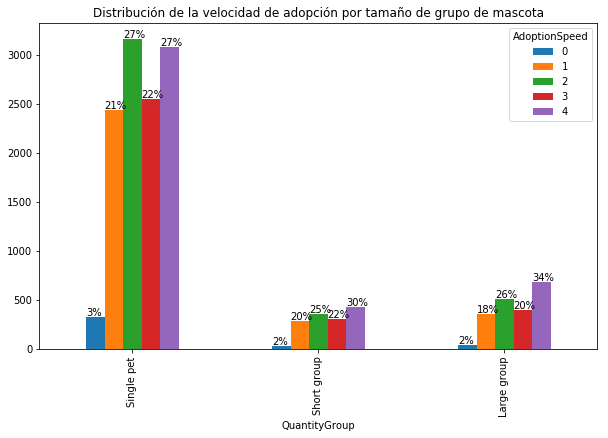

In [51]:
ax = qgruops.plot(kind='bar', figsize=(10,6))
ax.set_title("Distribución de la velocidad de adopción por tamaño de grupo de mascota")
for ix, (_,p) in enumerate(sorted([(p.get_xy(), p) for p in ax.patches])):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(q_percentages.values.flat[ix]), (x, y + height + 10))

Al parecer, el comportamiento de la velocidad de adopción se mantiene incluso para los anuncios
<br>más de una mascota. Esto significa que la velocidad de adopción es independiente del numero de mascotas.


### Fee

In [103]:
train.Fee.min(), train.Fee.max()

(0, 3000)

In [107]:
fee_data = train[['Fee', 'AdoptionSpeed', 'PetID']].copy()
fee_data.sample(10)

,Fee,AdoptionSpeed,PetID
686,0,3,bd37ccdd5
7460,0,2,5208915a3
6442,0,2,1314e3f92
14635,0,3,134e12e92
11591,0,4,3ea49aa4f
11516,0,3,9b3e95995
11059,0,4,2cde24ccc
6010,0,3,e90e0ffae
5077,0,4,a88733fd1
5156,0,4,6bbd4bbdc


In [108]:
fee_data['Free'] = fee_data.Fee.apply(lambda f: "Free" if f == 0 else "Not Free")

Text(0.5, 1.0, 'Cantidad de anuncios de adopción con pago necesario')

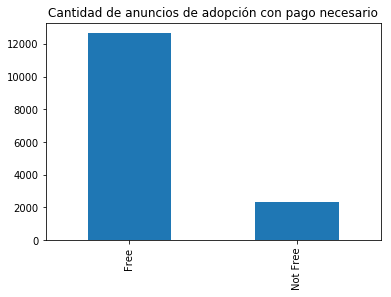

In [170]:
ax = fee_data['Free'].value_counts().plot.bar()
ax.set_title("Cantidad de anuncios de adopción con pago necesario")

In [115]:
feegroups = fee_data[['Free','AdoptionSpeed', 'PetID']].groupby(['Free','AdoptionSpeed']).count() 
feegroups = feegroups.reset_index()#.set_index(['QuantityGroup', 'AdoptionSpeed'])#.first()
feegroups = feegroups.pivot_table(index= 'Free',columns='AdoptionSpeed',values='PetID')
feegroups

AdoptionSpeed,0,1,2,3,4
Free,,,,,
Free,357,2611,3430,2789,3476
Not Free,53,479,607,470,721


In [119]:
feepercentages = (feegroups.T / feegroups.sum(axis=1)).T
feepercentages

AdoptionSpeed,0,1,2,3,4
Free,,,,,
Free,0.028192,0.206191,0.270868,0.220248,0.274501
Not Free,0.022747,0.205579,0.260515,0.201717,0.309442


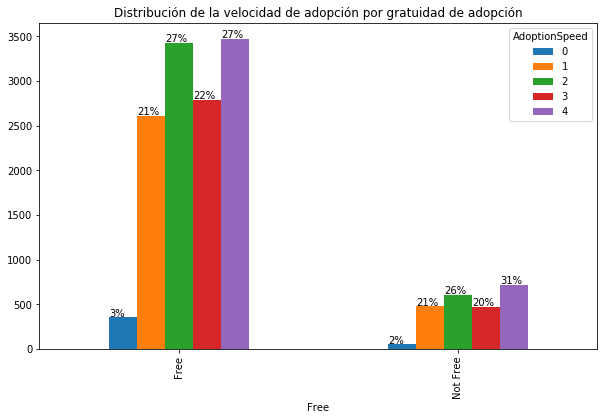

In [120]:
ax = feegroups.plot(kind='bar', figsize=(10,6))
ax.set_title("Distribución de la velocidad de adopción por gratuidad de adopción")
for ix, (_,p) in enumerate(sorted([(p.get_xy(), p) for p in ax.patches])):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(feepercentages.values.flat[ix]), (x, y + height + 10))

In [ ]:
plt.figure()

### State

In [58]:
train.StateName.value_counts()

Selangor           8714
Kuala Lumpur       3845
Pulau Pinang       843 
Johor              507 
Perak              420 
Negeri Sembilan    253 
Melaka             137 
Kedah              110 
Pahang             85  
Terengganu         26  
Sabah              22  
Kelantan           15  
Sarawak            13  
Labuan             3   
Name: StateName, dtype: int64

In [60]:
top5states = train.StateName.value_counts().index[:5]
top5states

Index(['Selangor', 'Kuala Lumpur', 'Pulau Pinang', 'Johor', 'Perak'], dtype='object')

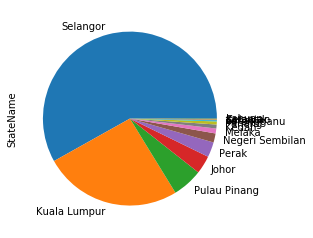

In [55]:
train.StateName.value_counts().plot.pie()

In [ ]:
#no se ve muy bonito. Los menores a Perak los catalogaremos como otros

In [85]:
state_data = train[['StateName', 'AdoptionSpeed']].copy()

In [86]:
state_data['StateNameSimple'] = state_data['StateName'].apply(lambda state:\
                                                               state if state in top5states\
                                                                     else "Others")

In [87]:
state_data['AdoptionSpeedSimple'] = state_data.AdoptionSpeed.apply(lambda speed:\
                                                                  "Adopted" if speed < 4\
                                                                  else "Not Adopted")

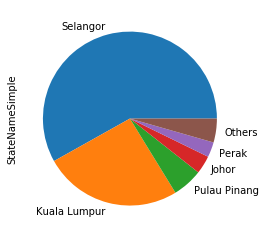

In [88]:
state_data.StateNameSimple.value_counts()\
                          .reindex(top5states.tolist() + ['Others']).plot.pie()

In [89]:
state_data.columns

Index(['StateName', 'AdoptionSpeed', 'StateNameSimple', 'AdoptionSpeedSimple'], dtype='object')

In [17]:
top3states = train.StateName.value_counts().index[:3]
top3states

Index(['Selangor', 'Kuala Lumpur', 'Pulau Pinang'], dtype='object')

In [28]:
stgroups = train.loc[train.StateName.isin(top3states)]
stgroups = stgroups[['StateName','AdoptionSpeed', 'PetID']].groupby(['StateName','AdoptionSpeed']).count() 
stgroups = stgroups.reset_index()#.set_index(['QuantityGroup', 'AdoptionSpeed'])#.first()
stgroups = stgroups.pivot_table(index= 'StateName',columns='AdoptionSpeed',values='PetID')
stgroups = stgroups.reindex(top3states)
stgroups

AdoptionSpeed,0,1,2,3,4
Selangor,246,1877,2435,2004,2152
Kuala Lumpur,112,814,996,731,1192
Pulau Pinang,8,122,216,197,300


In [29]:
stpercentages = (stgroups.T/stgroups.sum(axis=1)).T 
stpercentages

AdoptionSpeed,0,1,2,3,4
Selangor,0.028230,0.215401,0.279435,0.229975,0.246959
Kuala Lumpur,0.029129,0.211704,0.259038,0.190117,0.310013
Pulau Pinang,0.009490,0.144721,0.256228,0.233689,0.355872


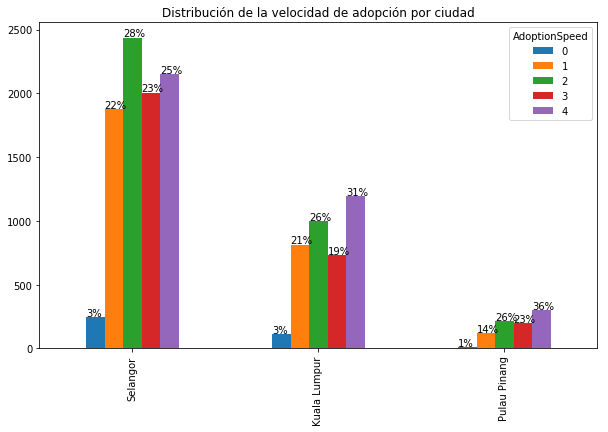

In [71]:
ax = stgroups.plot(kind='bar', figsize=(10,6))
ax.set_title("Distribución de la velocidad de adopción por ciudad")
for ix, (_,p) in enumerate(sorted([(p.get_xy(), p) for p in ax.patches])):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(stpercentages.values.flat[ix]), (x, y + height + 10))

In [90]:
stsimplegroups = state_data.loc[state_data.StateName.isin(top3states)]
stsimplegroups = stsimplegroups[['StateName','AdoptionSpeedSimple', 'StateNameSimple']].groupby(['StateName','AdoptionSpeedSimple']).count() 
stsimplegroups = stsimplegroups.reset_index()#.set_index(['QuantityGroup', 'AdoptionSpeed'])#.first()
stsimplegroups = stsimplegroups.pivot_table(index= 'StateName',columns='AdoptionSpeedSimple',values='StateNameSimple')
stsimplegroups = stsimplegroups.reindex(top3states)
stsimplegroups

AdoptionSpeedSimple,Adopted,Not Adopted
Selangor,6562,2152
Kuala Lumpur,2653,1192
Pulau Pinang,543,300


In [100]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [130]:
handles, labels = ax_selangor.get_legend_handles_labels()

([<matplotlib.patches.Wedge at 0x1ced2d30>,
 ['Adopted', 'Not Adopted'])

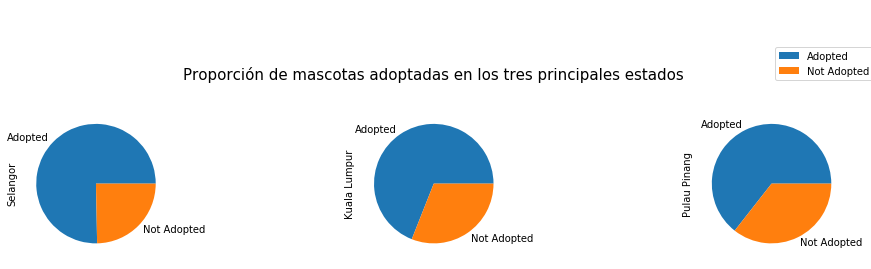

In [163]:
fig = plt.figure(figsize=(12,10))

plt.subplot(1,3,1)
ax_selangor = stsimplegroups.T['Selangor'].plot.pie()

handles, labels = ax_selangor.get_legend_handles_labels()
fig.legend( handles, labels, loc = (0.89, 0.7))

plt.subplot(1,3,2)
plt.title("Proporción de mascotas adoptadas en los tres principales estados", {'fontsize': 15}, pad = 30)
ax_kuala_lumpur = stsimplegroups.T['Kuala Lumpur'].plot.pie()

plt.subplot(1,3,3)
ax_pulau = stsimplegroups.T['Pulau Pinang'].plot.pie()


plt.tight_layout()

En el segundo y tercer estado del ranking, se observa que la proporción de mascotas no adoptadas es mayor que en Selangor.

### Description